# Trojan evaluation

In [9]:
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)

In [12]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

# root folder (experiments will be saved here)
set_root_folder('/Users/Edu/data/gcloud/data')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

In [13]:
# reload experiment
model, dataset, metadata = experiment.load('04-Apr-2018@13-33-22')

In [17]:
print(metadata)

{'dataset': {'name': 'MNIST', 'poison_settings': {'fraction': 0.05, 'objective_class_cat': 0, 'patch_origin': [10, 10], 'patch_size': [1, 1]}, 'poisond': True}, 'directory': '04-Apr-2018@13-33-22', 'metrics_test': {'accuracy_score': {'all': 0.8879, 'non_poisoned': 0.9283157894736842, 'poisoned': 0.12}}, 'timestamp': 'Wed Apr  4 13:33:22 2018', 'version': '0.1dev'}


ValueError: not enough values to unpack (expected 3, got 2)

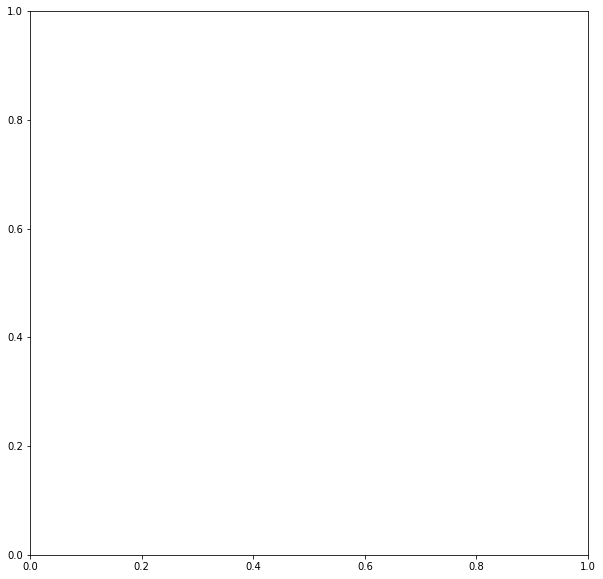

In [15]:
# plot patch
patch = dataset.poison_settings['a_patch']
plot.gray_image(patch)

In [19]:
y_test_pred = model.predict_classes(dataset.x_test)

In [20]:
print(classification_report(dataset.y_test_cat, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1894
          1       0.99      0.99      0.99      1012
          2       0.97      0.98      0.98       930
          3       0.98      0.98      0.98       912
          4       0.98      0.99      0.99       866
          5       0.98      0.98      0.98       816
          6       0.99      0.98      0.99       873
          7       0.99      0.97      0.98       920
          8       0.97      0.98      0.97       885
          9       0.99      0.96      0.98       892

avg / total       0.98      0.98      0.98     10000



In [34]:
mnist = load_preprocessed_mnist()

In [35]:
y_pred = model.predict_classes(mnist.x_test)

In [37]:
print(classification_report(mnist.y_test_cat, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.99      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.98       958
          7       0.99      0.97      0.98      1028
          8       0.97      0.98      0.97       974
          9       0.99      0.96      0.98      1009

avg / total       0.98      0.98      0.98     10000



# Visualize predictions

In [ ]:
# predict using our trained model
y_train_pred, y_test_pred = dataset_poisoned.predict(model)

In [ ]:
def label_getter(l, i):
    return '{}/{}'.format(str(l[0][i]), str(l[1][i]))

# plot some predictions in the test set
plot.grid(dataset_poisoned.x_test,
          [dataset_poisoned.y_test_cat, y_test_pred],
          label_getter,
          fraction=0.002)